In [2]:
"""In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.
Following the code to get data into the environment:"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
plt.style.use('fivethirtyeight')
import pickle

In [3]:
features['price'] = boston.target

In [4]:
df = features.copy()

In [5]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000164AE84A640>,
      dtype=object)

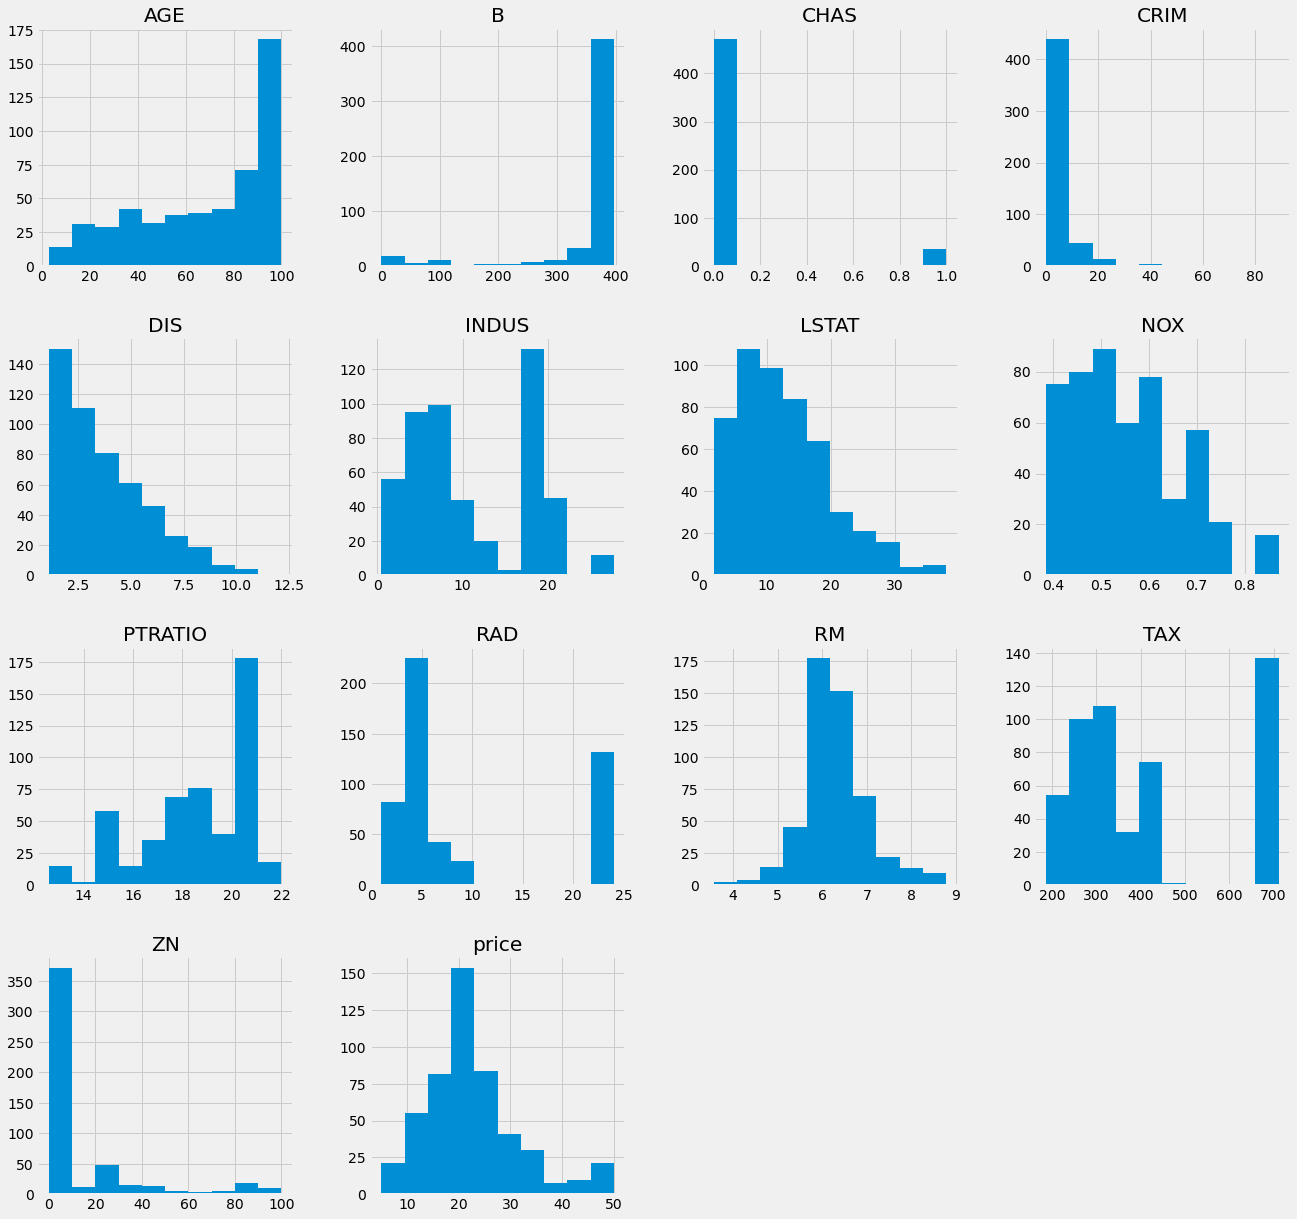

In [6]:
# check the NaN values
df.hist(figsize=(20,20))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64


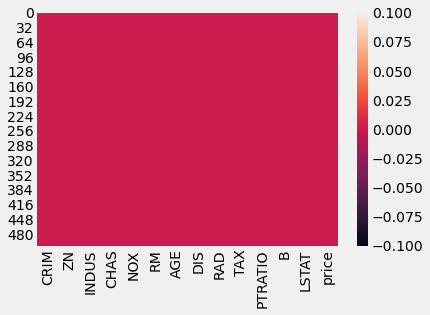

In [7]:
# checking null values
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [8]:
# checking the data types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

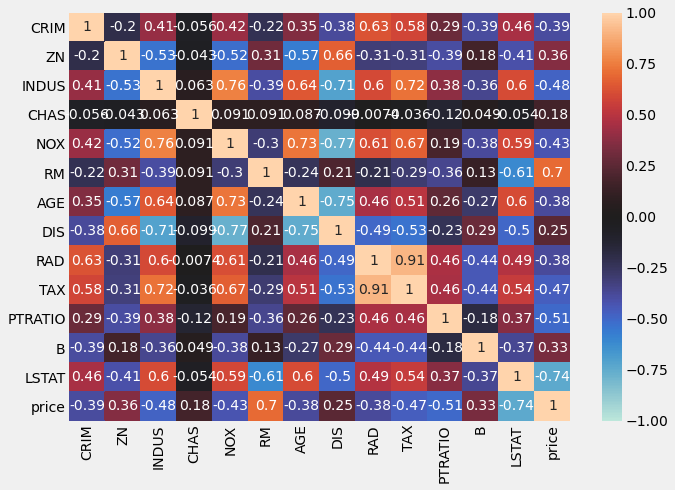

In [9]:
# check the correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,center=0,vmin=-1)

### GRAPHICAL analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


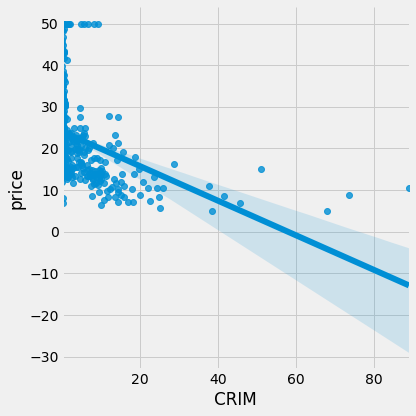

In [10]:
sns.lmplot('CRIM','price',data=df,size=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


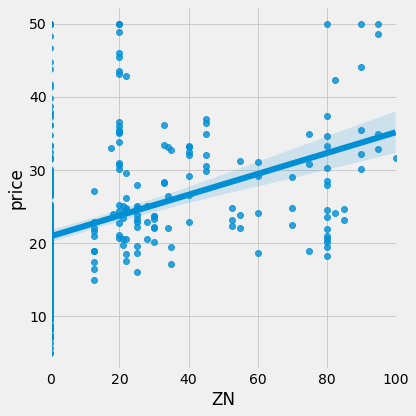

In [11]:
sns.lmplot('ZN','price',data=df,size=6)

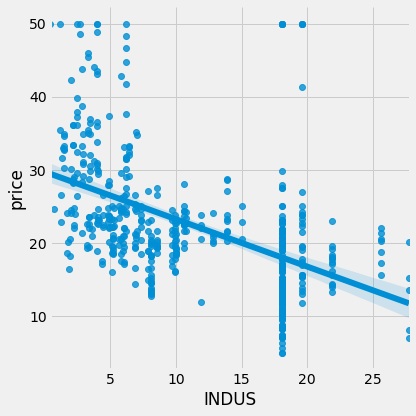

In [12]:
sns.lmplot('INDUS','price',data=df,height=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


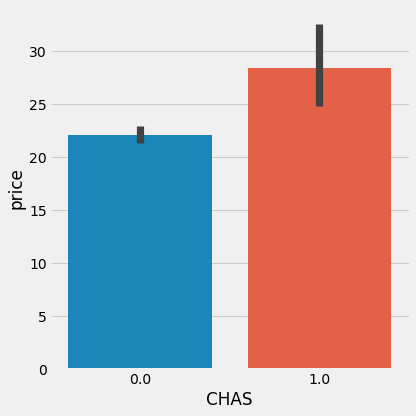

In [13]:
sns.catplot('CHAS','price',data=df,size=6,kind='bar')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


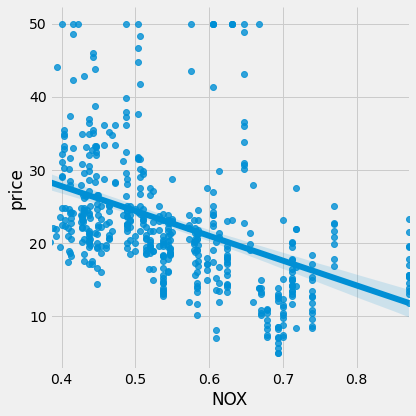

In [14]:
sns.lmplot('NOX','price',data=df,size=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


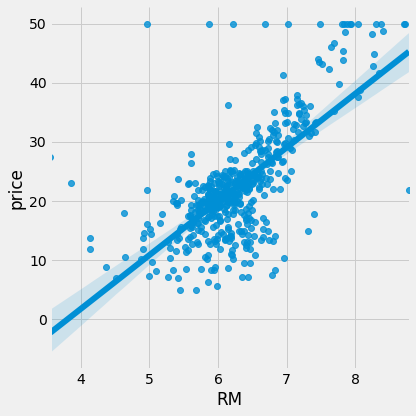

In [15]:
sns.lmplot('RM','price',data=df,size=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


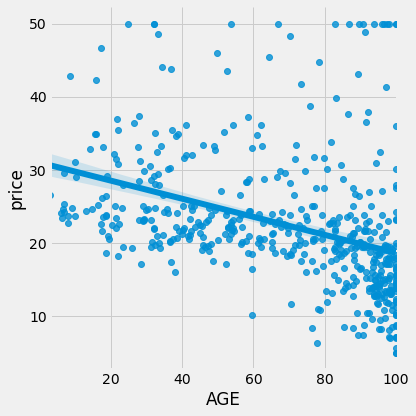

In [16]:
sns.lmplot('AGE','price',data=df,size=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


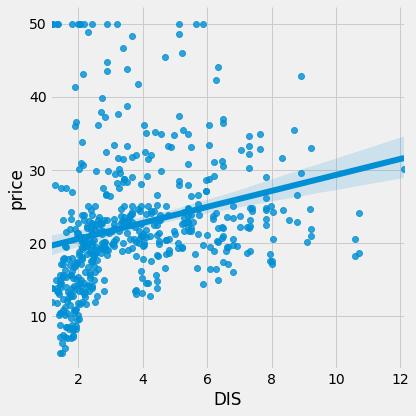

In [17]:
sns.lmplot('DIS','price',data=df,size=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


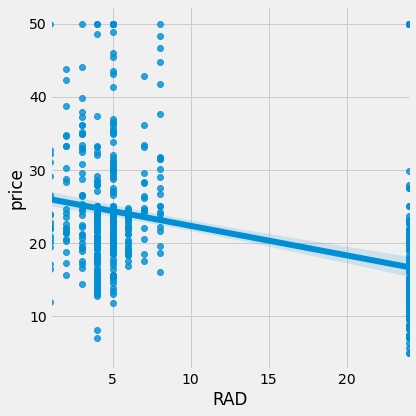

In [18]:
sns.lmplot('RAD','price',data=df,size=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


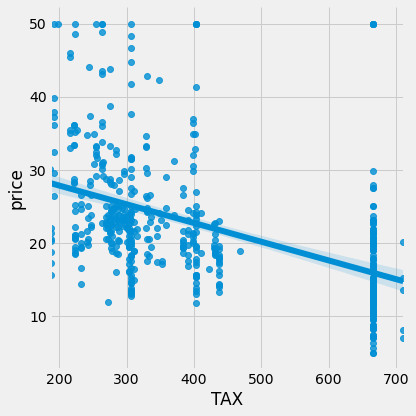

In [19]:
sns.lmplot('TAX','price',data=df,size=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


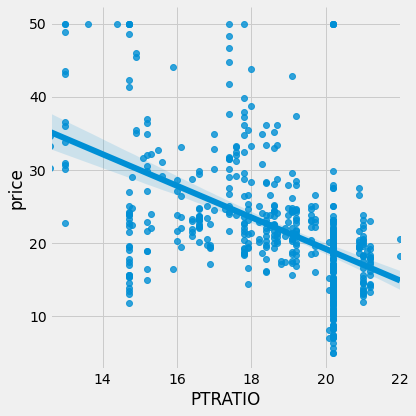

In [20]:
sns.lmplot('PTRATIO','price',data=df,size=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


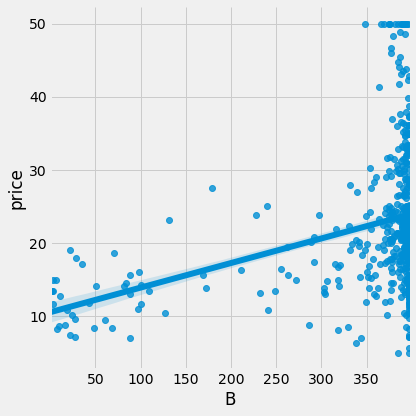

In [21]:
sns.lmplot('B','price',data=df,size=6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


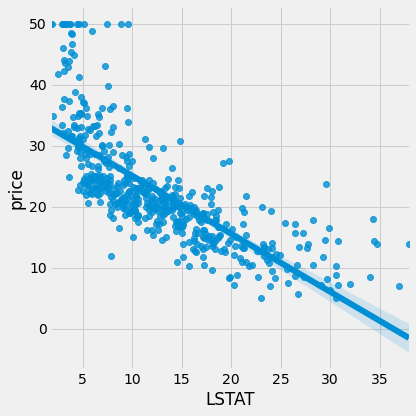

In [22]:
sns.lmplot('LSTAT','price',data=df,size=6)

### EDA

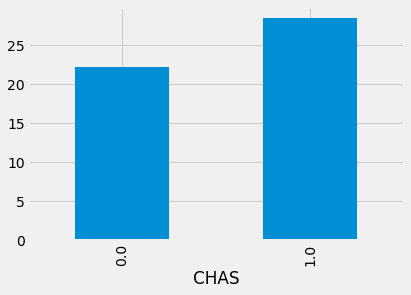

In [23]:
# avg price by CHAS
g = df.groupby(['CHAS']).mean()['price']
g.plot.bar()

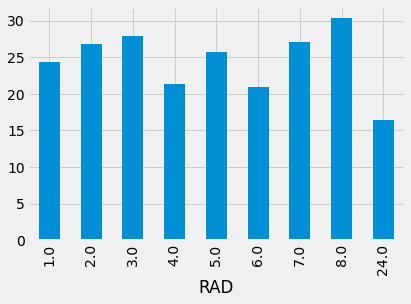

In [24]:
# avg price by RAD
g = df.groupby(['RAD']).mean()['price']
g.plot.bar()

In [25]:
# standarised the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.drop(['price'],axis=1)
y = df['price']
xscaled = scaler.fit_transform(x)

In [26]:
# checking the variation inflation factor for features correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(xscaled,i) for i in range(x.shape[1])]
vif['feature'] = x.columns
vif

,vif,feature
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [27]:
df.drop(['TAX'],axis=1,inplace=True)
x = df.drop(['price'],axis=1)
y = df['price']

In [28]:
xscaled = scaler.fit_transform(x)

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(xscaled,y,test_size=.25,random_state=31)

In [30]:
print('xtrain shape ' ,xtrain.shape)
print('ytrain shape ' ,ytrain.shape)
print('xtest shape ' ,xtest.shape)
print('ytest shape ' ,ytest.shape)

xtrain shape  (379, 12)
ytrain shape  (379,)
xtest shape  (127, 12)
ytest shape  (127,)


In [31]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=10,random_state=12).fit(xtrain,ytrain)
print('train_score ' , clf.score(xtrain,ytrain))
print('test_score ', clf.score(xtest,ytest))

train_score  0.9797501209440593
test_score  0.7778689627535351


In [32]:
# model evalution using cross valiation
score = cross_val_score(RandomForestRegressor(n_estimators=10,random_state=34),xscaled,y,cv=5)
print('mean score = ',np.mean(score))

mean score =  0.590898666092757


In [38]:
import pickle
pickle.dump(clf,open('randomforest.sav','wb'))

In [39]:
model = pickle.load(open('randomforest.sav','rb'))

In [51]:
model.predict([[0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33]])

array([35.83])